## Importing Libraries 

In [1]:
import os
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

Creating the DataFrame using pandas

In [2]:
df= pd.read_csv(r'''C:\Users\kenny\Desktop\DataScience Related Affair\DSN Kaggle Competition\train.csv''')
test=pd.read_csv(r'''C:\Users\kenny\Desktop\DataScience Related Affair\DSN Kaggle Competition\test.csv''')

In [3]:
#viewing the first five rows of the DataFrame
df.head(5).transpose()

,0,1,2,3,4
Product_Identifier,DRA12,DRA12,DRA12,DRA12,DRA12
Supermarket_Identifier,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI018,CHUKWUDI035
Product_Supermarket_Identifier,DRA12_CHUKWUDI010,DRA12_CHUKWUDI013,DRA12_CHUKWUDI017,DRA12_CHUKWUDI018,DRA12_CHUKWUDI035
Product_Weight,11.6,11.6,11.6,11.6,11.6
Product_Fat_Content,Low Fat,Low Fat,Low Fat,Low Fat,Ultra Low fat
Product_Shelf_Visibility,0.068535,0.0409118,0.0411775,0.0411127,0
Product_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks
Product_Price,357.54,355.79,350.79,355.04,354.79
Supermarket_Opening_Year,2005,1994,2014,2016,2011
Supermarket _Size,NaN,High,NaN,Medium,Small


## Exploratory Data Analysis

In [4]:
#checking for the information in the DataFrame
df.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


The above shows describes the numerical features of the dataset, and from this we can observe that the 802 row are filled with `NaN` values in the `Product_Weight feature`. Later on we are going to deal with missing values, but now let's focus on the Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


We can observe that there are five Numerical features and we are going to see how they correlate with one another using seaborn to produce a heatmap

In [6]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
Product_Identifier,4990,1451,DRE49,9
Supermarket_Identifier,4990,10,CHUKWUDI049,620
Product_Supermarket_Identifier,4990,4990,FDZ55_CHUKWUDI017,1
Product_Fat_Content,4990,3,Low Fat,3039
Product_Type,4990,16,Snack Foods,758
Supermarket _Size,3540,3,Medium,1582
Supermarket_Location_Type,4990,3,Cluster 3,1940
Supermarket_Type,4990,4,Supermarket Type1,3304


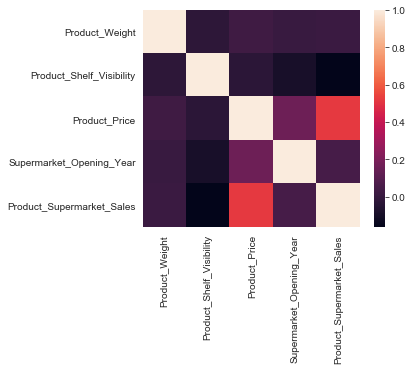

In [7]:
#Heat map
corrmat= df.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

From the above, we can see from the heatmap that the features that are correlated with the target variable `Product_Supermarket_Sales`. The following are what could be deduced from the above heatmap
* It is seen that `Product_price` has a very high correlation with the `Product_Supermarket_Sales`
* It can also be observed that the other feature which is reasonably correlated with `Product_Supermarket_Sales` is the  `Supermarket_Opening_Year
> **Interpretation**: One of the major thing that affects the sales in the supermarket is the price of the product, i.e if the price is high, then the sales will be low and vice versa. Also it we see that the year the store is opened also matters, new stores may tend to get more sales than old stores, just maybe!
`It is very important to note that this is just a correlation and correlation does not mean causation.`

C:\Users\kenny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kenny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


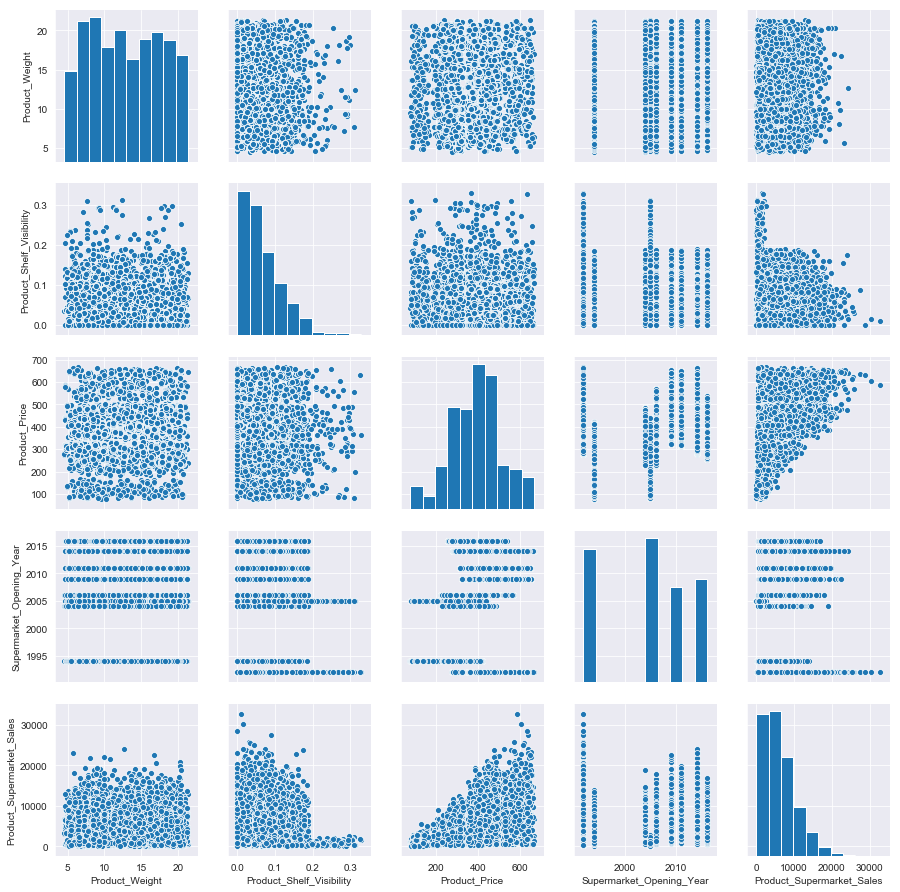

In [8]:
sns.pairplot(df);

The following can be deduced from the above chart
> * Items with high product price, have low sales and vice versa
* Items with low product shelf visibility have high sales
* The stores opened in year less than 1995 has the highest product sales
* We can observe two clusters in the opening year i.e stores that opened in 90s and stores that opened in 2000s

### Exploring Categorical Variables

Listed below are the categorical variables
>* Supermarket_Opening_Year          
* Supermarket _Size
* Supermarket_Identifier
* Supermarket_Location_Type         
* Supermarket_Type
* Product_Type
* Product_Fat_Content

In [9]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

In [10]:
df.rename(columns={'Supermarket _Size':'Supermarket_Size'}, inplace=True)
cat_cols=['Supermarket_Opening_Year','Supermarket_Size','Supermarket_Location_Type',
          'Supermarket_Type','Product_Type','Product_Fat_Content', 'Supermarket_Identifier']
count_unique(df,cat_cols)


For column Supermarket_Opening_Year
1992    802
2006    620
1994    594
2014    583
2011    515
2004    509
2016    500
2009    483
2005    384
Name: Supermarket_Opening_Year, dtype: int64

For column Supermarket_Size
Medium    1582
Small     1364
High       594
Name: Supermarket_Size, dtype: int64

For column Supermarket_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dtype: int64

For column Supermarket_Type
Supermarket Type1    3304
Grocery Store         724
Supermarket Type2     500
Supermarket Type3     462
Name: Supermarket_Type, dtype: int64

For column Product_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others            

Data Aggregation will be done on one feature which is: `Product_Type` 

In [11]:
dataset=[df,test]
product={'Seafood':'Consumable', 'Breakfast':'Consumable', 'Starchy Foods':'Consumable', 'Others':'Non-Consumable',
        'Hard Drinks':'Drinks', 'Breads':'Consumable', 'Soft Drinks':'Drinks', 'Meat':'Consumable', 
         'Health and Hygiene':'Non-Consumable', 'Baking Goods':'Consumable', 'Dairy':'Consumable', 'Canned':'Consumable',
        'Frozen Foods':'Consumable','Household':'Non-Consumable','Fruits and Vegetables':'Consumable',
         'Snack Foods':'Consumable'}
for data in dataset:
    data['Product_Type']=data['Product_Type'].replace(product)

In [12]:
df['Product_Type'].value_counts()

Consumable        3621
Non-Consumable     974
Drinks             395
Name: Product_Type, dtype: int64

Generating a feature `Supermarket_Age` from the `Supermarket_Opening_Year` column

In [13]:
dataset=[df, test]
for data in dataset:
    data['Supermarket_Age']= 2018-data.Supermarket_Opening_Year

df['Supermarket_Age'].value_counts()

26    802
12    620
24    594
4     583
7     515
14    509
2     500
9     483
13    384
Name: Supermarket_Age, dtype: int64

In [14]:
age= {26:'>10 years',12:'>10 years',24:'>10 years',4:'<10 years', 7:'<10 years', 14:'>10 years', 2:'<10 years', 9:'<10 years',
     13:'>10 years'}
dataset=[df, test]
for data in dataset:
    data['Supermarket_Age']=data['Supermarket_Age'].replace(age)

df['Supermarket_Age'].value_counts()

>10 years    2909
<10 years    2081
Name: Supermarket_Age, dtype: int64

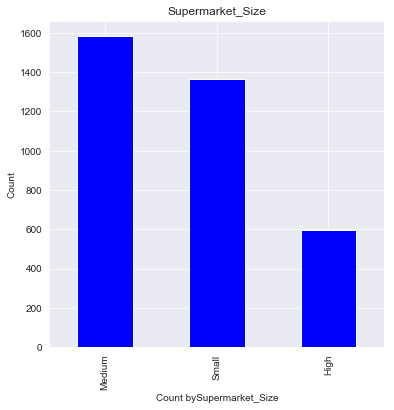

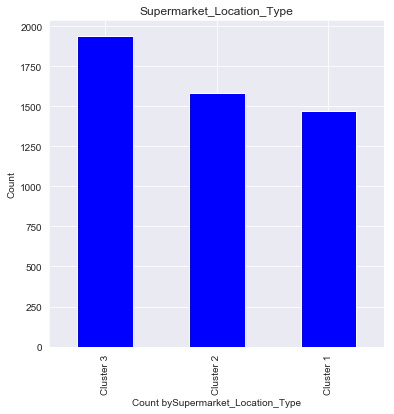

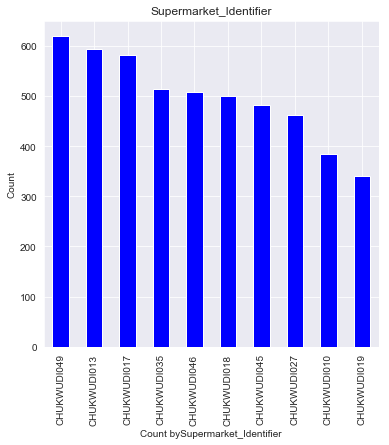

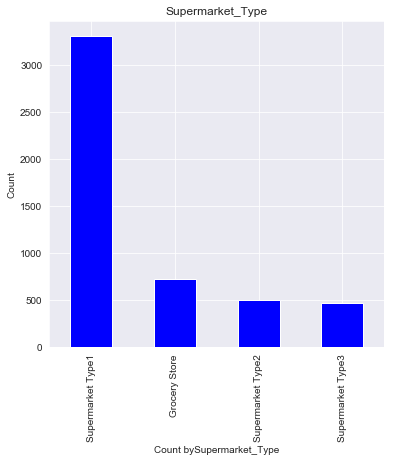

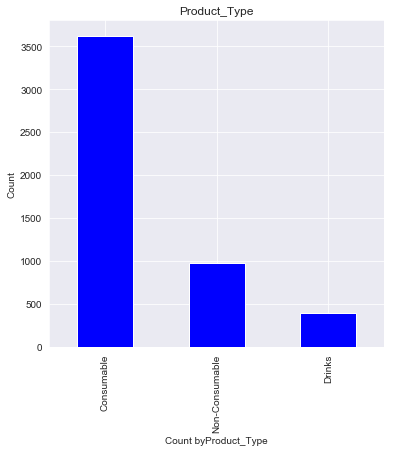

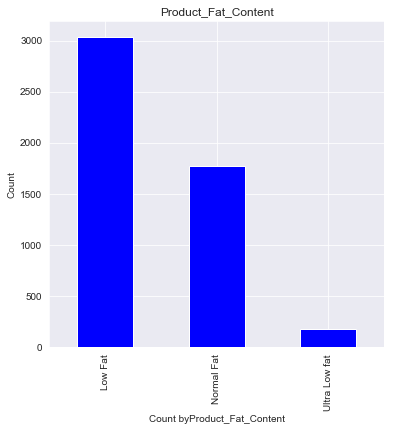

In [15]:
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title(col) # Give the plot a main title
        ax.set_xlabel('Count by' + col) # Set text for the x axis
        ax.set_ylabel('Count')# Set text for y axis
        plt.show()

plot_cols = ['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price']
cat_cols=['Supermarket_Size','Supermarket_Location_Type','Supermarket_Identifier',
          'Supermarket_Type','Product_Type','Product_Fat_Content']
plot_bars(df, cat_cols)

C:\Users\kenny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kenny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kenny\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


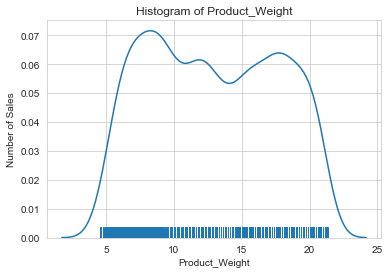

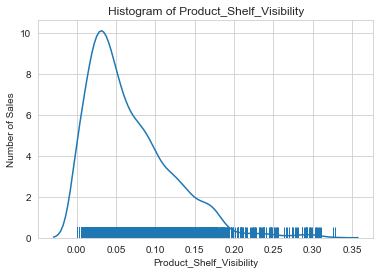

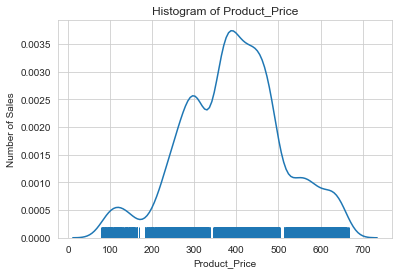

In [16]:
def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of Sales')# Set text for y axis
        plt.show()
        
plot_density_hist(df, plot_cols)  

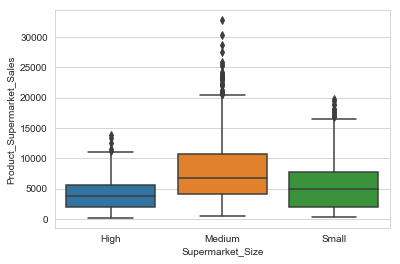

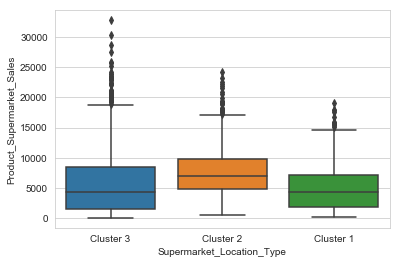

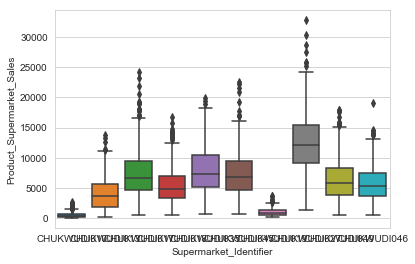

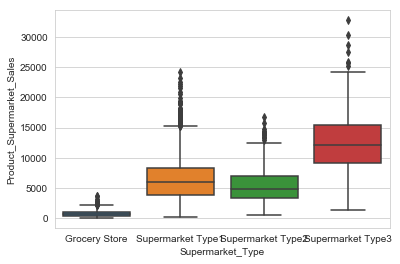

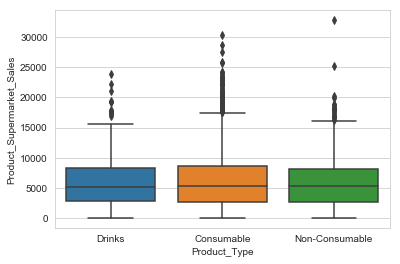

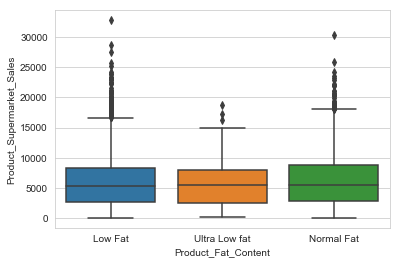

In [17]:
def plot_box(auto_prices, cols, col_y = 'Product_Supermarket_Sales'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
plot_box(df, cat_cols)

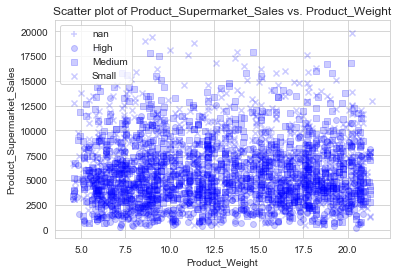

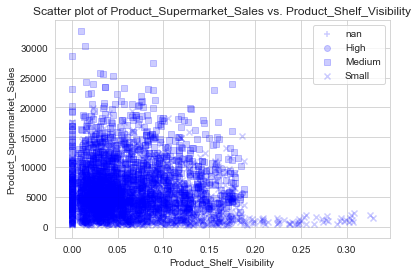

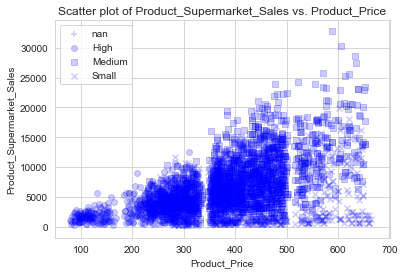

In [18]:
def plot_scatter_shape(df, cols, shape_col = 'Supermarket_Size', col_y = 'Product_Supermarket_Sales', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
        
plot_scatter_shape(df, plot_cols) 

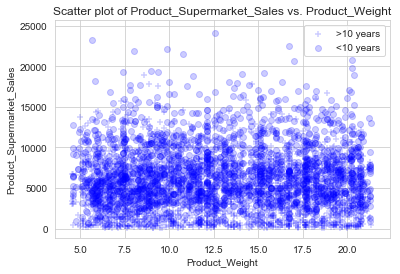

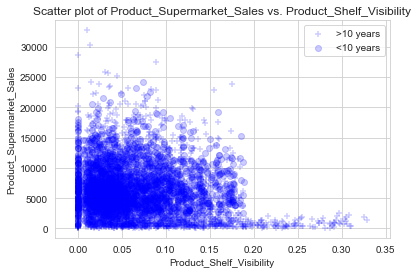

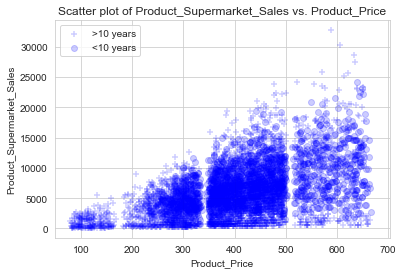

In [19]:
plot_scatter_shape(df, plot_cols, shape_col='Supermarket_Age') 

From the above plot, it can be seen that the product price in Supermarket opening year greater than 10 years have high product price and they als have high sales. Product Shelf Visibility in the Supermarket opening year greater than 10 years is low generally and those with high shelf visibility have low sales. 

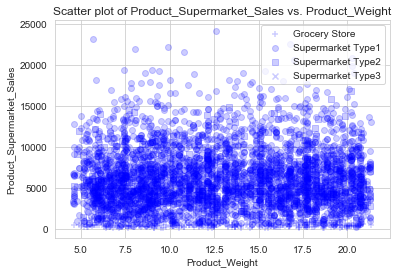

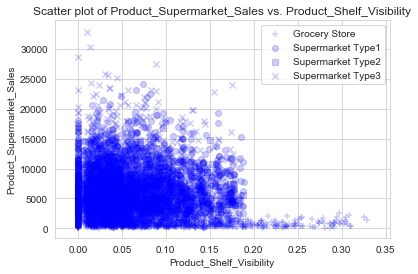

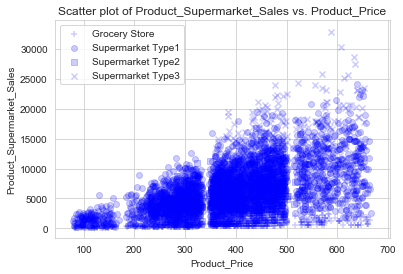

In [20]:
plot_scatter_shape(df, plot_cols, shape_col='Supermarket_Type') 

Supermarket Type 3 has the lowest shelf visibility but still has the highest sales. Supermarket Type 3 has the highest price and the highest sales also

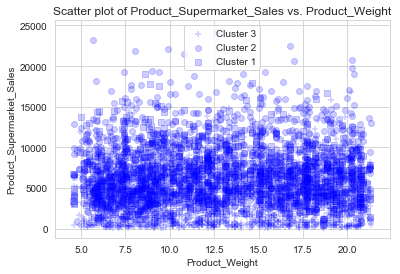

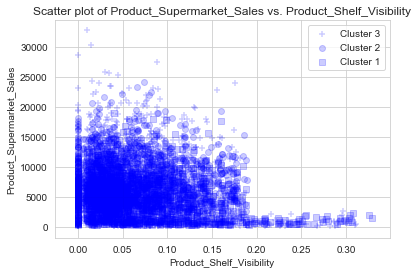

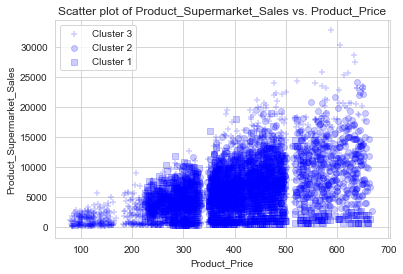

In [21]:
plot_scatter_shape(df, plot_cols, shape_col='Supermarket_Location_Type')

Cluster 3 has the lowest product shelf visibility and the highest price and it still posseses the highest sales

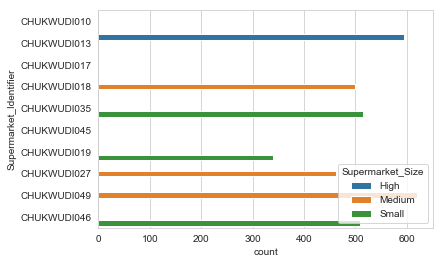

In [22]:
sns.countplot(data=df, y='Supermarket_Identifier', hue='Supermarket_Size')

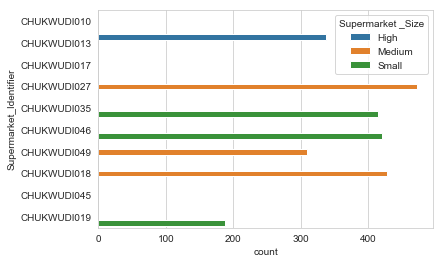

In [23]:
sns.countplot(data=test, y='Supermarket_Identifier', hue='Supermarket _Size')

This above plot will aid to help fill in the missing data in the supermarket size section soon

Removing Duplicates, as duplicates could cause serious bias in machine learning models

In [24]:
#This is performed on the train set
df.drop_duplicates(subset = 'Product_Supermarket_Identifier', keep = 'first', inplace = True)
print(df.shape)
print(df.Product_Supermarket_Identifier.unique().shape)

(4990, 14)
(4990,)


We go ahead to check for null values in the train set and test set 

In [25]:
df.isnull().sum()

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     802
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket_Size                  1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
Supermarket_Age                      0
dtype: int64

In [26]:
test.isnull().sum()

Product_Identifier                  0
Supermarket_Identifier              0
Product_Supermarket_Identifier      0
Product_Weight                    661
Product_Fat_Content                 0
Product_Shelf_Visibility            0
Product_Type                        0
Product_Price                       0
Supermarket_Opening_Year            0
Supermarket _Size                 959
Supermarket_Location_Type           0
Supermarket_Type                    0
Supermarket_Age                     0
dtype: int64

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 13 columns):
Product_Identifier                3532 non-null object
Supermarket_Identifier            3532 non-null object
Product_Supermarket_Identifier    3532 non-null object
Product_Weight                    2871 non-null float64
Product_Fat_Content               3532 non-null object
Product_Shelf_Visibility          3532 non-null float64
Product_Type                      3532 non-null object
Product_Price                     3532 non-null float64
Supermarket_Opening_Year          3532 non-null int64
Supermarket _Size                 2573 non-null object
Supermarket_Location_Type         3532 non-null object
Supermarket_Type                  3532 non-null object
Supermarket_Age                   3532 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 358.8+ KB


In [28]:
dataset=[df, test]
cols=['Product_Weight']
for column in cols:
    df.loc[df[column] == 0, column] = np.nan

In [29]:
df.head(10)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,Supermarket_Age
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.60,Low Fat,0.068535,Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,>10 years
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.60,Low Fat,0.040912,Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,>10 years
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.60,Low Fat,0.041178,Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,<10 years
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.60,Low Fat,0.041113,Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,<10 years
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.60,Ultra Low fat,0.000000,Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,<10 years
5,DRA12,CHUKWUDI045,DRA12_CHUKWUDI045,11.60,Low Fat,0.000000,Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54,<10 years
6,DRA24,CHUKWUDI010,DRA24_CHUKWUDI010,19.35,Normal Fat,0.066832,Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93,>10 years
7,DRA24,CHUKWUDI013,DRA24_CHUKWUDI013,19.35,Normal Fat,0.039895,Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61,>10 years
8,DRA24,CHUKWUDI017,DRA24_CHUKWUDI017,19.35,Normal Fat,0.040154,Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27,<10 years
9,DRA24,CHUKWUDI019,DRA24_CHUKWUDI019,NaN,Normal Fat,0.069909,Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40,>10 years


In [30]:
test.rename(columns={'Supermarket _Size':'Supermarket_Size'}, inplace=True)
test.head(10)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Supermarket_Age
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Drinks,459.98,2005,NaN,Cluster 3,Grocery Store,>10 years
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Drinks,464.98,1994,High,Cluster 3,Supermarket Type1,>10 years
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Drinks,477.38,1994,High,Cluster 3,Supermarket Type1,>10 years
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Drinks,472.63,2005,NaN,Cluster 3,Grocery Store,>10 years
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Drinks,473.13,1994,High,Cluster 3,Supermarket Type1,>10 years
5,DRB25,CHUKWUDI017,DRB25_CHUKWUDI017,12.300,Low Fat,0.069853,Drinks,268.73,2014,NaN,Cluster 2,Supermarket Type1,<10 years
6,DRB25,CHUKWUDI027,DRB25_CHUKWUDI027,NaN,Low Fat,0.069123,Drinks,265.23,1992,Medium,Cluster 3,Supermarket Type3,>10 years
7,DRB25,CHUKWUDI035,DRB25_CHUKWUDI035,12.300,Low Fat,0.069447,Drinks,265.98,2011,Small,Cluster 2,Supermarket Type1,<10 years
8,DRB48,CHUKWUDI017,DRB48_CHUKWUDI017,16.750,Normal Fat,0.024994,Drinks,93.71,2014,NaN,Cluster 2,Supermarket Type1,<10 years
9,DRB48,CHUKWUDI027,DRB48_CHUKWUDI027,NaN,Normal Fat,0.024733,Drinks,100.71,1992,Medium,Cluster 3,Supermarket Type3,>10 years


In [31]:
#filling null values
df['Product_Weight']=df['Product_Weight'].fillna(method='ffill')

In [32]:
df.head(10)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,Supermarket_Age
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.60,Low Fat,0.068535,Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,>10 years
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.60,Low Fat,0.040912,Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,>10 years
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.60,Low Fat,0.041178,Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,<10 years
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.60,Low Fat,0.041113,Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,<10 years
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.60,Ultra Low fat,0.000000,Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,<10 years
5,DRA12,CHUKWUDI045,DRA12_CHUKWUDI045,11.60,Low Fat,0.000000,Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54,<10 years
6,DRA24,CHUKWUDI010,DRA24_CHUKWUDI010,19.35,Normal Fat,0.066832,Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93,>10 years
7,DRA24,CHUKWUDI013,DRA24_CHUKWUDI013,19.35,Normal Fat,0.039895,Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61,>10 years
8,DRA24,CHUKWUDI017,DRA24_CHUKWUDI017,19.35,Normal Fat,0.040154,Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27,<10 years
9,DRA24,CHUKWUDI019,DRA24_CHUKWUDI019,19.35,Normal Fat,0.069909,Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40,>10 years


In [33]:
df['Product_Weight']=df['Product_Weight'].fillna(method='bfill')

In [34]:
test.head(10)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Supermarket_Age
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Drinks,459.98,2005,NaN,Cluster 3,Grocery Store,>10 years
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Drinks,464.98,1994,High,Cluster 3,Supermarket Type1,>10 years
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Drinks,477.38,1994,High,Cluster 3,Supermarket Type1,>10 years
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Drinks,472.63,2005,NaN,Cluster 3,Grocery Store,>10 years
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Drinks,473.13,1994,High,Cluster 3,Supermarket Type1,>10 years
5,DRB25,CHUKWUDI017,DRB25_CHUKWUDI017,12.300,Low Fat,0.069853,Drinks,268.73,2014,NaN,Cluster 2,Supermarket Type1,<10 years
6,DRB25,CHUKWUDI027,DRB25_CHUKWUDI027,NaN,Low Fat,0.069123,Drinks,265.23,1992,Medium,Cluster 3,Supermarket Type3,>10 years
7,DRB25,CHUKWUDI035,DRB25_CHUKWUDI035,12.300,Low Fat,0.069447,Drinks,265.98,2011,Small,Cluster 2,Supermarket Type1,<10 years
8,DRB48,CHUKWUDI017,DRB48_CHUKWUDI017,16.750,Normal Fat,0.024994,Drinks,93.71,2014,NaN,Cluster 2,Supermarket Type1,<10 years
9,DRB48,CHUKWUDI027,DRB48_CHUKWUDI027,NaN,Normal Fat,0.024733,Drinks,100.71,1992,Medium,Cluster 3,Supermarket Type3,>10 years


In [35]:
test['Product_Weight']=test['Product_Weight'].fillna(method='ffill')
test['Product_Weight']=test['Product_Weight'].fillna(method='bfill')

In [36]:
feature=['Supermarket_Identifier', 'Supermarket_Size', 'Supermarket_Location_Type', 'Supermarket_Type']
compare=df[feature]
compare.head(10)

,Supermarket_Identifier,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type
0,CHUKWUDI010,NaN,Cluster 3,Grocery Store
1,CHUKWUDI013,High,Cluster 3,Supermarket Type1
2,CHUKWUDI017,NaN,Cluster 2,Supermarket Type1
3,CHUKWUDI018,Medium,Cluster 3,Supermarket Type2
4,CHUKWUDI035,Small,Cluster 2,Supermarket Type1
5,CHUKWUDI045,NaN,Cluster 2,Supermarket Type1
6,CHUKWUDI010,NaN,Cluster 3,Grocery Store
7,CHUKWUDI013,High,Cluster 3,Supermarket Type1
8,CHUKWUDI017,NaN,Cluster 2,Supermarket Type1
9,CHUKWUDI019,Small,Cluster 1,Grocery Store


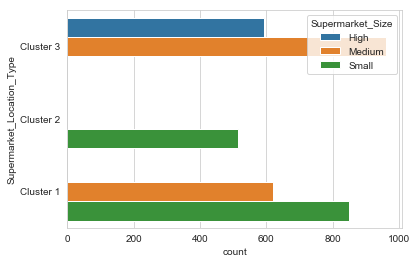

In [37]:
sns.countplot(data=compare, y='Supermarket_Location_Type', hue='Supermarket_Size')

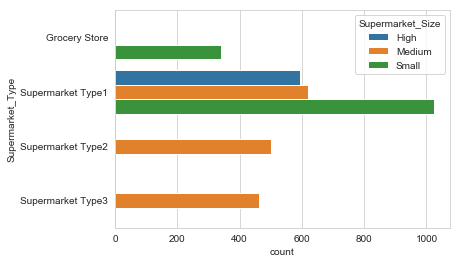

In [38]:
sns.countplot(data=compare, y='Supermarket_Type', hue='Supermarket_Size')

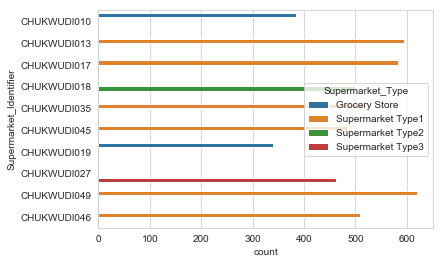

In [39]:
sns.countplot(data=compare, y='Supermarket_Identifier', hue='Supermarket_Type')

from the above, we see that CHUKWUDI010 is a Grocery Store, and from the observation, we see that Grocery Stores are small, hence it is safe to say that CHUKWUDI010 is Small. CHUKWUDI010 and CHUKWUDI045 are Supermarket Type 1, we can observe that Supermarket Type 1 consists of both High, Medium and Small Supermarket Sizes

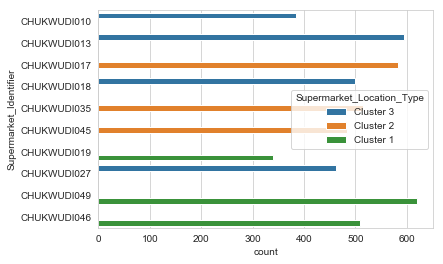

In [40]:
sns.countplot(data=compare, y='Supermarket_Identifier', hue='Supermarket_Location_Type')

From this, we can observe that CHUKWUDI017 and CHUKWUDI045 are both in cluster 2 and from the plot we observed before, Cluster 2 has small supermarket sizes. Hence, it is safe that CHUKWUDI017 and CHUKWUDI045 are both Small Supermarket Sizes. 

In [41]:
sizes={'CHUKWUDI010':'Small', 'CHUKWUDI013':'High', 'CHUKWUDI017':'Small', 'CHUKWUDI027':'Medium', 'CHUKWUDI035':'Small',
      'CHUKWUDI046':'Small', 'CHUKWUDI049':'Medium', 'CHUKWUDI018':'Medium', 'CHUKWUDI045':'Small', 'CHUKWUDI019':'Small'}
df['Supermarket_Size']=df['Supermarket_Identifier'].map({k:v for k,v in sizes.items()})
test['Supermarket_Size']=test['Supermarket_Identifier'].map({k:v for k,v in sizes.items()})

In [42]:
df.head(5)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,Supermarket_Age
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Drinks,357.54,2005,Small,Cluster 3,Grocery Store,709.08,>10 years
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,>10 years
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,6381.69,<10 years
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,<10 years
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,<10 years


In [43]:
test.head(5)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Supermarket_Age
0,DRA59,CHUKWUDI010,DRA59_CHUKWUDI010,8.270,Normal Fat,0.214125,Drinks,459.98,2005,Small,Cluster 3,Grocery Store,>10 years
1,DRA59,CHUKWUDI013,DRA59_CHUKWUDI013,8.270,Normal Fat,0.127821,Drinks,464.98,1994,High,Cluster 3,Supermarket Type1,>10 years
2,DRB01,CHUKWUDI013,DRB01_CHUKWUDI013,7.390,Low Fat,0.082171,Drinks,477.38,1994,High,Cluster 3,Supermarket Type1,>10 years
3,DRB13,CHUKWUDI010,DRB13_CHUKWUDI010,6.115,Normal Fat,0.011791,Drinks,472.63,2005,Small,Cluster 3,Grocery Store,>10 years
4,DRB13,CHUKWUDI013,DRB13_CHUKWUDI013,6.115,Normal Fat,0.007038,Drinks,473.13,1994,High,Cluster 3,Supermarket Type1,>10 years


In [44]:
df.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
Product_Identifier,4990,1451,DRE49,9
Supermarket_Identifier,4990,10,CHUKWUDI049,620
Product_Supermarket_Identifier,4990,4990,FDZ55_CHUKWUDI017,1
Product_Fat_Content,4990,3,Low Fat,3039
Product_Type,4990,3,Consumable,3621
Supermarket_Size,4990,3,Small,2814
Supermarket_Location_Type,4990,3,Cluster 3,1940
Supermarket_Type,4990,4,Supermarket Type1,3304
Supermarket_Age,4990,2,>10 years,2909


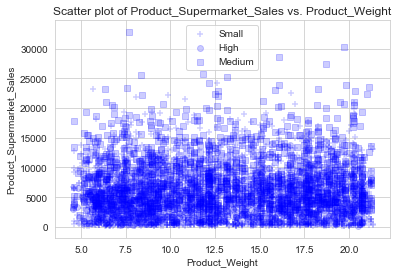

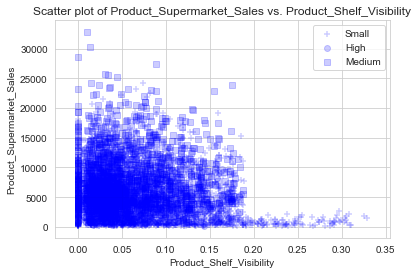

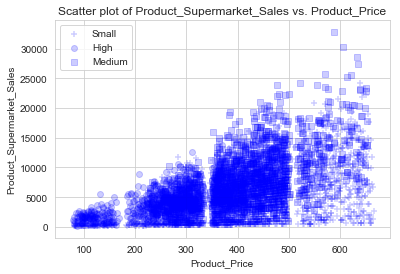

In [45]:
plot_scatter_shape(df, plot_cols)

We notice that the Small Supermarket Size is now the highest occuring as compared to before we imputed the missing values when the Medium size was the highest. Also we noticed that from the above plot that the insights drawn from this plot before imputing missing values remains the same and nothing changes 

In [46]:
print('Train Shape:', df.shape)
print('Test Shape:', test.shape)

Train Shape: (4990, 14)
Test Shape: (3532, 13)


C:\Users\kenny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kenny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kenny\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


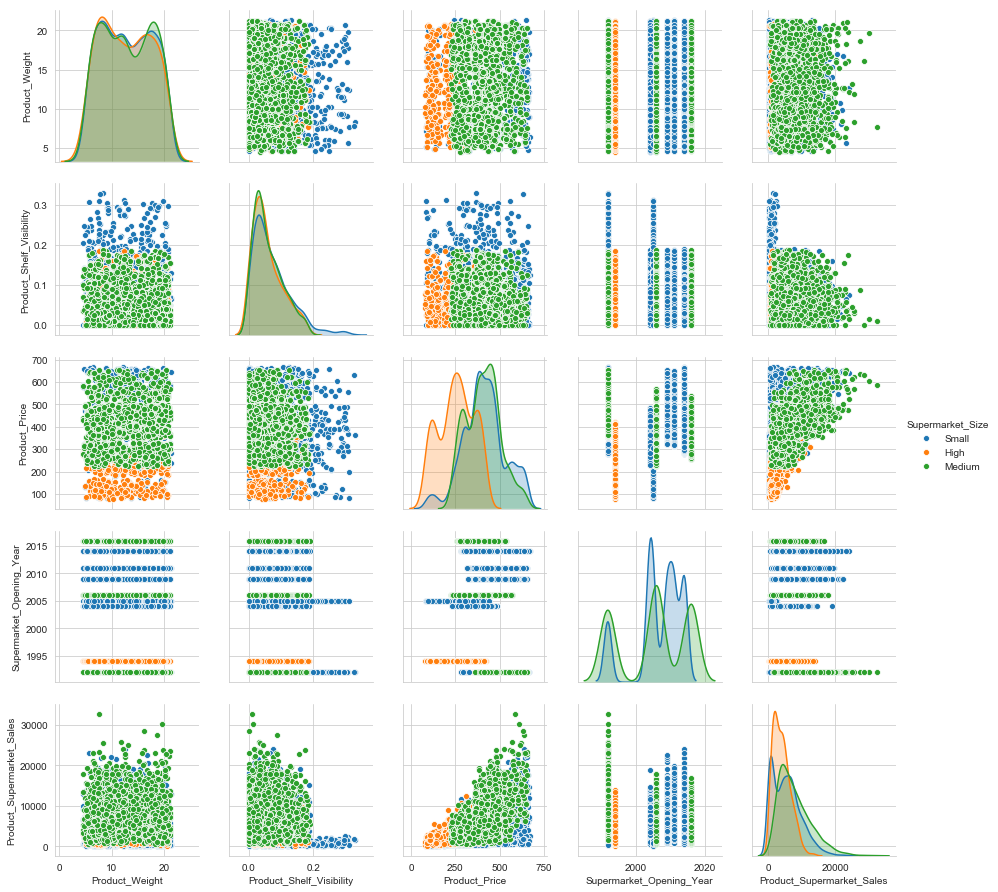

In [47]:
sns.pairplot(df, hue='Supermarket_Size');

Creating Dummy Variables

In [48]:
#Dummy Variables
train=pd.get_dummies(df, prefix=['Product_Type','Supermarket_Size', 'Supermarket_Identifier','Product_Fat_Content','Supermarket_Location_Type', 'Supermarket_Type','Supermarket_Age'], 
                           columns=['Product_Type','Supermarket_Size','Supermarket_Identifier', 'Product_Fat_Content','Supermarket_Location_Type', 'Supermarket_Type','Supermarket_Age'])

In [49]:
test.rename(columns={'Supermarket _Size':'Supermarket_Size'}, inplace=True)
#Dummy Variable for test set
test=pd.get_dummies(test, prefix=['Product_Type','Supermarket_Size', 'Supermarket_Identifier', 'Product_Fat_Content','Supermarket_Location_Type', 'Supermarket_Type','Supermarket_Age'], 
                           columns=['Product_Type','Supermarket_Size', 'Supermarket_Identifier', 'Product_Fat_Content','Supermarket_Location_Type', 'Supermarket_Type','Supermarket_Age'])

In [50]:
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (4990, 35)
Test Shape: (3532, 34)


Text(0.5, 1.0, 'Correlation Matrix')

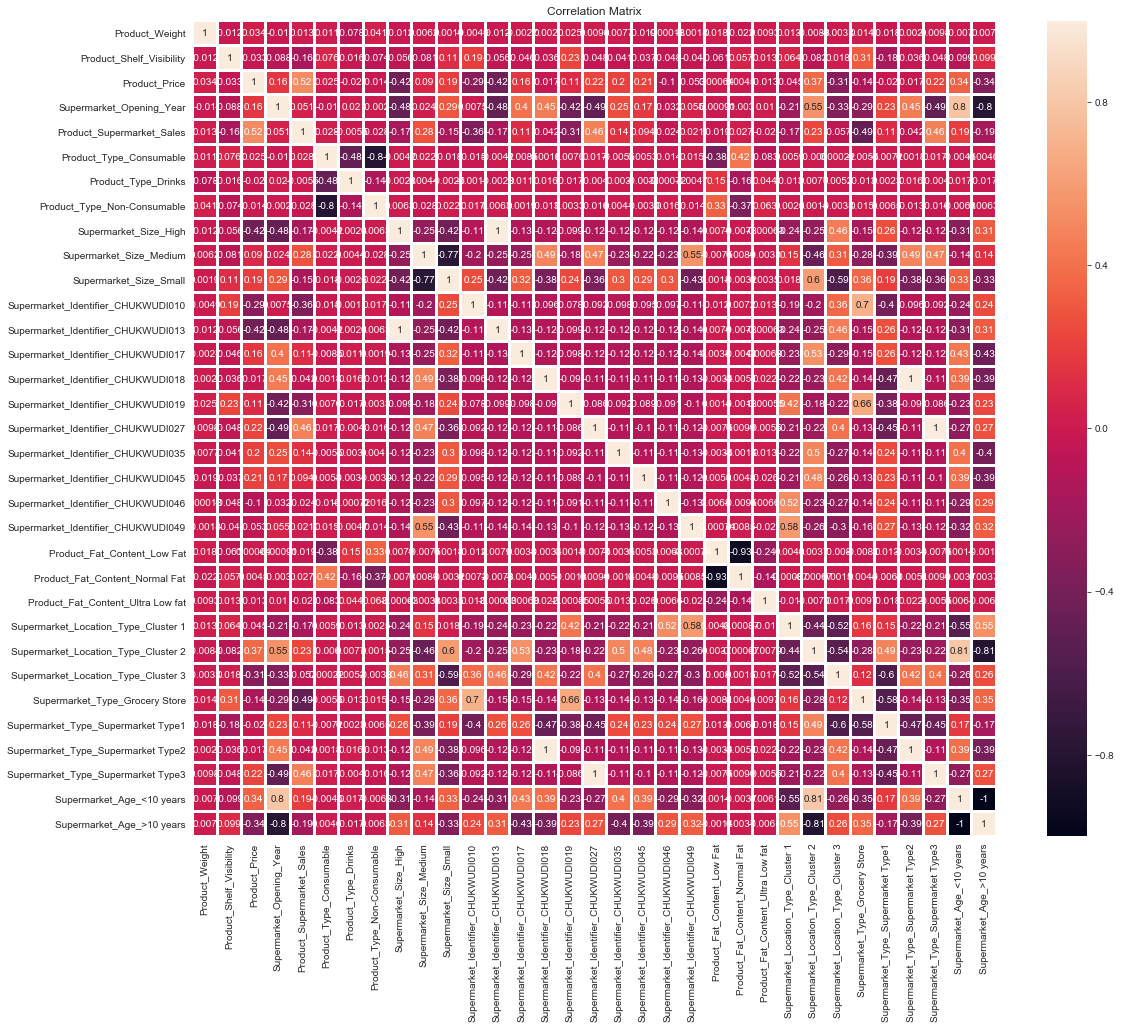

In [51]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(train.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [52]:
train.columns

Index(['Product_Identifier', 'Product_Supermarket_Identifier',
       'Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Opening_Year', 'Product_Supermarket_Sales',
       'Product_Type_Consumable', 'Product_Type_Drinks',
       'Product_Type_Non-Consumable', 'Supermarket_Size_High',
       'Supermarket_Size_Medium', 'Supermarket_Size_Small',
       'Supermarket_Identifier_CHUKWUDI010',
       'Supermarket_Identifier_CHUKWUDI013',
       'Supermarket_Identifier_CHUKWUDI017',
       'Supermarket_Identifier_CHUKWUDI018',
       'Supermarket_Identifier_CHUKWUDI019',
       'Supermarket_Identifier_CHUKWUDI027',
       'Supermarket_Identifier_CHUKWUDI035',
       'Supermarket_Identifier_CHUKWUDI045',
       'Supermarket_Identifier_CHUKWUDI046',
       'Supermarket_Identifier_CHUKWUDI049', 'Product_Fat_Content_Low Fat',
       'Product_Fat_Content_Normal Fat', 'Product_Fat_Content_Ultra Low fat',
       'Supermarket_Location_Type_Cluster 1',
       'Supermarke

In [53]:
test.columns

Index(['Product_Identifier', 'Product_Supermarket_Identifier',
       'Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Opening_Year', 'Product_Type_Consumable',
       'Product_Type_Drinks', 'Product_Type_Non-Consumable',
       'Supermarket_Size_High', 'Supermarket_Size_Medium',
       'Supermarket_Size_Small', 'Supermarket_Identifier_CHUKWUDI010',
       'Supermarket_Identifier_CHUKWUDI013',
       'Supermarket_Identifier_CHUKWUDI017',
       'Supermarket_Identifier_CHUKWUDI018',
       'Supermarket_Identifier_CHUKWUDI019',
       'Supermarket_Identifier_CHUKWUDI027',
       'Supermarket_Identifier_CHUKWUDI035',
       'Supermarket_Identifier_CHUKWUDI045',
       'Supermarket_Identifier_CHUKWUDI046',
       'Supermarket_Identifier_CHUKWUDI049', 'Product_Fat_Content_Low Fat',
       'Product_Fat_Content_Normal Fat', 'Product_Fat_Content_Ultra Low fat',
       'Supermarket_Location_Type_Cluster 1',
       'Supermarket_Location_Type_Cluster 2',
       '

## Splitting Data and Applying Algorithm

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [55]:
feature_col_names=['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Product_Type_Consumable', 'Product_Type_Drinks',
       'Product_Type_Non-Consumable', 'Supermarket_Size_High',
       'Supermarket_Size_Medium', 'Supermarket_Size_Small',
       'Supermarket_Identifier_CHUKWUDI010',
       'Supermarket_Identifier_CHUKWUDI013',
       'Supermarket_Identifier_CHUKWUDI017',
       'Supermarket_Identifier_CHUKWUDI018',
       'Supermarket_Identifier_CHUKWUDI019',
       'Supermarket_Identifier_CHUKWUDI027',
       'Supermarket_Identifier_CHUKWUDI035',
       'Supermarket_Identifier_CHUKWUDI045',
       'Supermarket_Identifier_CHUKWUDI046',
       'Supermarket_Identifier_CHUKWUDI049', 'Product_Fat_Content_Low Fat',
       'Product_Fat_Content_Normal Fat', 'Product_Fat_Content_Ultra Low fat',
       'Supermarket_Location_Type_Cluster 1',
       'Supermarket_Location_Type_Cluster 2',
       'Supermarket_Location_Type_Cluster 3', 'Supermarket_Type_Grocery Store',
       'Supermarket_Type_Supermarket Type1',
       'Supermarket_Type_Supermarket Type2',
       'Supermarket_Type_Supermarket Type3', 'Supermarket_Age_<10 years',
       'Supermarket_Age_>10 years']
predicted_class_names=['Product_Supermarket_Sales']
X=train[feature_col_names].values
y=train[predicted_class_names].values 
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [56]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


In [57]:
columns=['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Product_Type_Consumable', 'Product_Type_Drinks',
       'Product_Type_Non-Consumable', 'Supermarket_Size_High',
       'Supermarket_Size_Medium', 'Supermarket_Size_Small',
       'Supermarket_Identifier_CHUKWUDI010',
       'Supermarket_Identifier_CHUKWUDI013',
       'Supermarket_Identifier_CHUKWUDI017',
       'Supermarket_Identifier_CHUKWUDI018',
       'Supermarket_Identifier_CHUKWUDI019',
       'Supermarket_Identifier_CHUKWUDI027',
       'Supermarket_Identifier_CHUKWUDI035',
       'Supermarket_Identifier_CHUKWUDI045',
       'Supermarket_Identifier_CHUKWUDI046',
       'Supermarket_Identifier_CHUKWUDI049', 'Product_Fat_Content_Low Fat',
       'Product_Fat_Content_Normal Fat', 'Product_Fat_Content_Ultra Low fat',
       'Supermarket_Location_Type_Cluster 1',
       'Supermarket_Location_Type_Cluster 2',
       'Supermarket_Location_Type_Cluster 3', 'Supermarket_Type_Grocery Store',
       'Supermarket_Type_Supermarket Type1',
       'Supermarket_Type_Supermarket Type2',
       'Supermarket_Type_Supermarket Type3', 'Supermarket_Age_<10 years',
       'Supermarket_Age_>10 years']
test1=test[columns]

In [58]:
print(X_train.shape)
print(test1.shape)

(3493, 31)
(3532, 31)


In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [60]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
regpred=reg.predict(X_train)
regpred_test=reg.predict(X_test)
print("Accuracy on training set:{:.7f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.7f}".format(reg.score(X_test, y_test)))

MSE= mean_squared_error(y_train, regpred)
MSE_test= mean_squared_error(y_test, regpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set:0.5614615
Accuracy on test set: 0.5445477
MSE: 8677544.774344154
MSE Test: 8988450.11829428
RMSE: 2945.7672641171357
RMSE Test: 2998.0744017275956


In [62]:
print(regpred_test)

[[ 974.59195565]
 [6734.59195565]
 [9174.59195565]
 ...
 [3334.59195565]
 [3982.59195565]
 [6386.59195565]]


In [63]:
solution=reg.predict(test1)

print(solution)

[[3538.59195565]
 [7316.59195565]
 [7388.59195565]
 ...
 [8786.59195565]
 [3346.59195565]
 [6876.59195565]]


In [64]:
np.savetxt('LinearRegressionSupermarket01.csv', solution, delimiter=',')

In [65]:
gbr=GradientBoostingRegressor (max_depth=3, n_estimators=100)
gbr.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

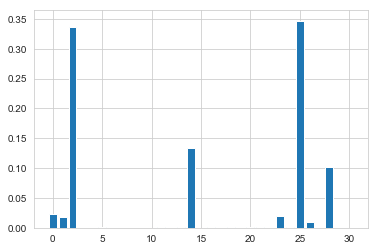

In [66]:
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

In [67]:
print("Accuracy on training set: {:.7f}".format(gbr.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(gbr.score(X_test, y_test)))
gbrpred=gbr.predict(X_train)
gbrpred_test=gbr.predict(X_test)

MSE= mean_squared_error(y_train, gbrpred)
MSE_test= mean_squared_error(y_test, gbrpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.6336274
Accuracy on test set: 0.5491778
MSE: 7249567.873165951
MSE Test: 8897072.589327501
RMSE: 2692.5021584329234
RMSE Test: 2982.7961025399477


In [68]:
solution=gbr.predict(test1)
print(solution)

[1116.34185594 7731.50732678 7801.50333314 ... 9324.48473618 1272.67477975
 7595.00710169]


In [69]:
my_submission=pd.DataFrame({'Product_Supermarket_Identifier':test.Product_Supermarket_Identifier,'Product_Supermarket_Sales': solution})
my_submission.to_csv('GradientBoostingSupermarket01.csv', index=False)

In [70]:
ls=Lasso()
ls.fit(X_train, y_train.ravel())

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
print("Accuracy on training set: {:.7f}".format(ls.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(ls.score(X_test, y_test)))
lspred=ls.predict(X_train)
lspred_test=ls.predict(X_test)

MSE= mean_squared_error(y_train, lspred)
MSE_test= mean_squared_error(y_test, lspred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.5621920
Accuracy on test set: 0.5462415
MSE: 8663089.95218286
MSE Test: 8955021.995271098
RMSE: 2943.3127513369795
RMSE Test: 2992.494276564468


In [72]:
solution=ls.predict(test1)
print(solution)

[3438.53246051 7198.68646183 7266.8742131  ... 8828.02655342 3344.48688654
 6851.49910279]


In [73]:
my_submission=pd.DataFrame({'Product_Supermarket_Identifier':test.Product_Supermarket_Identifier,'Product_Supermarket_Sales': solution})
my_submission.to_csv('LassoSupermarket01.csv', index=False)

In [74]:
rd=Ridge(solver='svd')
rd.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='svd', tol=0.001)

In [75]:
print("Accuracy on training set: {:.7f}".format(rd.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(rd.score(X_test, y_test)))
rdpred=rd.predict(X_train)
rdpred_test=rd.predict(X_test)

MSE= mean_squared_error(y_train, rdpred)
MSE_test= mean_squared_error(y_test, rdpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.5621926
Accuracy on test set: 0.5462020
MSE: 8663078.056186305
MSE Test: 8955801.341781478
RMSE: 2943.3107304846876
RMSE Test: 2992.6244906071124


In [76]:
solution=rd.predict(test1)

print(solution)

[[3438.90542467]
 [7199.05792471]
 [7265.7755177 ]
 ...
 [8823.12039251]
 [3340.35175069]
 [6846.24577363]]


In [77]:
np.savetxt('RidgeSupermarket01.csv', solution, delimiter=',')

In [78]:
rf=RandomForestRegressor(min_samples_leaf=20, max_features=1.0, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1.0, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

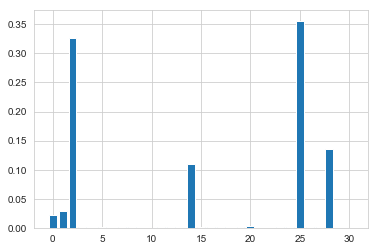

In [79]:
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()

In [80]:
print("Accuracy on training set: {:.7f}".format(rf.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(rf.score(X_test, y_test)))
rfpred=rf.predict(X_train)
rfpred_test=rf.predict(X_test)

MSE= mean_squared_error(y_train, rfpred)
MSE_test= mean_squared_error(y_test, rfpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.6329934
Accuracy on test set: 0.5556730
MSE: 7262112.638607436
MSE Test: 8768890.152508564
RMSE: 2694.8307254088218
RMSE Test: 2961.2311886289062


In [81]:
solution=rf.predict(test1)

print(solution)

[1125.54471321 7692.07792325 8356.24249737 ... 9064.40138737 1240.52274423
 7654.10219898]


In [82]:
my_submission=pd.DataFrame({'Product_Supermarket_Identifier':test.Product_Supermarket_Identifier,'Product_Supermarket_Sales': solution})
my_submission.to_csv('RandomForestSupermarket.csv', index=False)

In [83]:
svr=SVR(C=10000, degree=5, kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=10000, cache_size=200, coef0=0.0, degree=5, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
print("Accuracy on training set: {:.7f}".format(svr.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(svr.score(X_test, y_test)))
svrpred=svr.predict(X_train)
svrpred_test=svr.predict(X_test)

MSE= mean_squared_error(y_train, svrpred)
MSE_test= mean_squared_error(y_test, svrpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.5940962
Accuracy on test set: 0.5447988
MSE: 8031788.901642239
MSE Test: 8983494.793271396
RMSE: 2834.0410903235397
RMSE Test: 2997.2478698418313


In [85]:
solution=svr.predict(test1)

print(solution)

[ 1158.12673766  7294.00226146  7853.17870976 ... 11632.14801574
  1233.30668981  8150.01534585]


In [86]:
my_submission=pd.DataFrame({'Product_Supermarket_Identifier':test.Product_Supermarket_Identifier,'Product_Supermarket_Sales': solution})
my_submission.to_csv('SVRSupermarket01.csv', index=False)

In [87]:
kn=KNeighborsRegressor(n_neighbors=10, p=5, weights='uniform')
kn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=5,
          weights='uniform')

In [88]:
print("Accuracy on training set: {:.7f}".format(kn.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(kn.score(X_test, y_test)))
knpred=kn.predict(X_train)
knpred_test=kn.predict(X_test)

MSE= mean_squared_error(y_train, knpred)
MSE_test= mean_squared_error(y_test, knpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.6035553
Accuracy on test set: 0.5131199
MSE: 7844617.192489832
MSE Test: 9608684.459567111
RMSE: 2800.824377302124
RMSE Test: 3099.7878087970976


In [89]:
solution=kn.predict(test1)

print(solution)

[[ 631.679]
 [6340.746]
 [5707.071]
 ...
 [7354.595]
 [1149.171]
 [5313.418]]


In [90]:
np.savetxt('KNNSupermarket01.csv', solution, delimiter=',')

In [91]:
import xgboost as xgb
xgb=xgb.XGBRegressor(max_depth=3, n_estimators=50)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

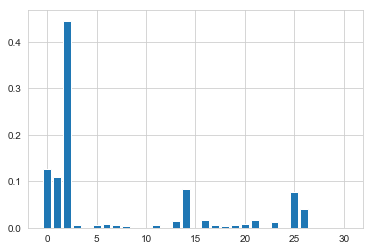

In [92]:
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

In [93]:
print("Accuracy on training set: {:.7f}".format(xgb.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(xgb.score(X_test, y_test)))
xgbpred=xgb.predict(X_train)
xgbpred_test=xgb.predict(X_test)

MSE= mean_squared_error(y_train, xgbpred)
MSE_test= mean_squared_error(y_test, xgbpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.6080120
Accuracy on test set: 0.5528779
MSE: 7756430.921568319
MSE Test: 8824051.941581517
RMSE: 2785.0369695155428
RMSE Test: 2970.5305825023106


In [94]:
solution=xgb.predict(test1)

print(solution)

[1613.1674 7644.2725 7653.0576 ... 8428.511  1713.1337 7520.004 ]


In [95]:
my_submission=pd.DataFrame({'Product_Supermarket_Identifier':test.Product_Supermarket_Identifier,'Product_Supermarket_Sales': solution})
my_submission.to_csv('XGBSupermarket01.csv', index=False)